In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

## 이미지 준비 거대고양이

(1280, 1920, 3)


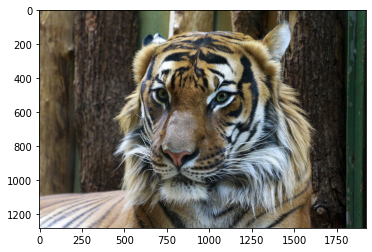

In [3]:
img_path = '/aiffel/aiffel/human_segmentation/images/tiger.jpg'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 학습된 모델 다운로드

In [4]:
import requests
model_dir = '/aiffel/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

In [5]:
res = requests.get(model_url)
with open(model_file, 'wb') as model:
    model.write(res.content)

In [6]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [8]:
# 사전 학습된 모델의 레이블 클래스
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

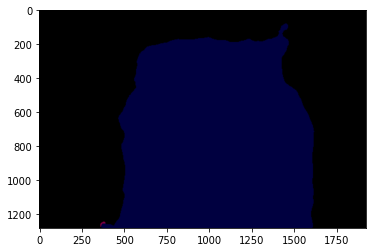

In [9]:
plt.imshow(output)
plt.show()

In [10]:
# 예측한 모델 값
segvalues

{'class_ids': array([ 0,  8, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [11]:
# 예측한 레이블들
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


In [12]:
colormap = np.zeros((256,3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1)  << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
LABEL_NAMES

['background',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tv']

In [14]:
colormap[8]

array([64,  0,  0])

In [15]:
seg_color = (0,0,64)

## 이미지 추출 확인

(1280, 1920)


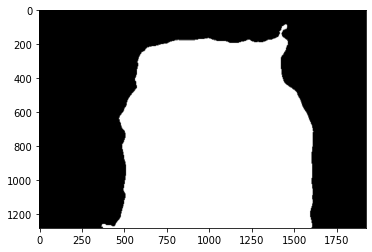

In [16]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

## 원본과 겹쳐보기

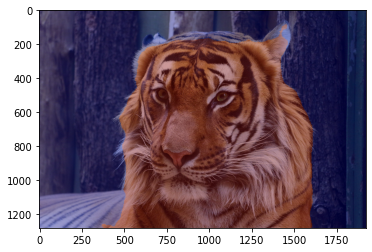

In [17]:
img_show = img_orig.copy()
# True, False인 값을 255와 0으로
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스트 합성 원본0.6, 마스트0.4
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 하기

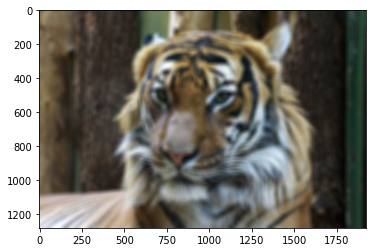

In [18]:
img_orig_blur = cv2.blur(img_orig,(30,30))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

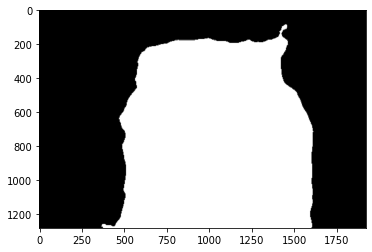

In [19]:
# 기존에 마스킹된 이미지
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
plt.imshow(img_mask_color)

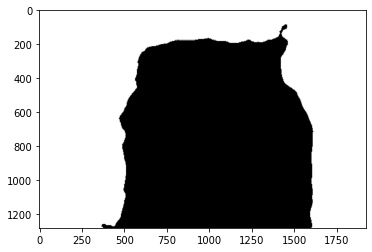

In [20]:
# 백그라운드와 반전
img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)

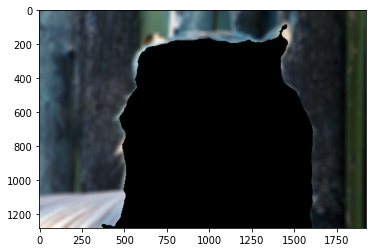

In [21]:
# 기존 블러된 이미지와 결합 img_bg_mask값이 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(img_bg_blur)

## 이미지 합성

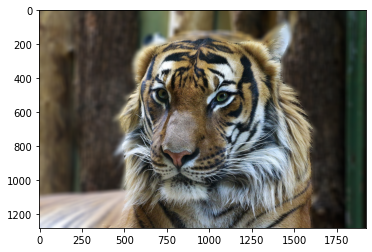

In [22]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

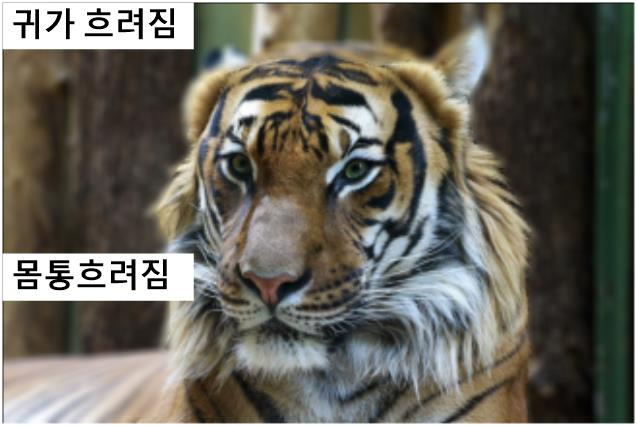

## 이미지 준비 거대 맹수

(545, 979, 3)


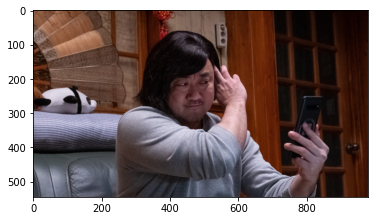

In [24]:
img_path = '/aiffel/aiffel/human_segmentation/images/madong.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 모델 로드

In [25]:
segvalues, output = model.segmentAsPascalvoc(img_path)

## 모델 결과

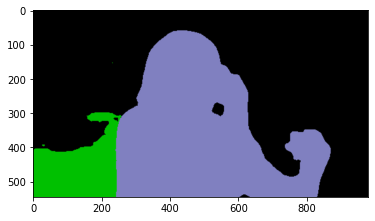

In [26]:
plt.imshow(output)
plt.show()

## 예측 결과

In [27]:
# 예측한 레이블들
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person
sofa


In [28]:
# 사람 컬러맵 확인
colormap[15]

array([192, 128, 128])

In [29]:
# 컬러맵 뒤집기 BGR 순서를 RGB로
seg_color = (128,128,192)

(545, 979)


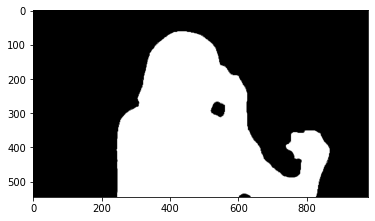

In [30]:
# 이미지 추출 확인
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

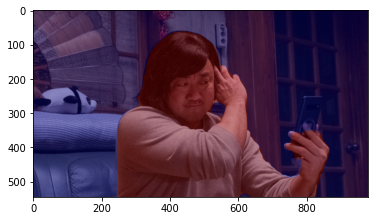

In [31]:
# 원본과 합쳐보기
img_show = img_orig.copy()
# True, False인 값을 255와 0으로
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스트 합성 원본0.6, 마스트0.4
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

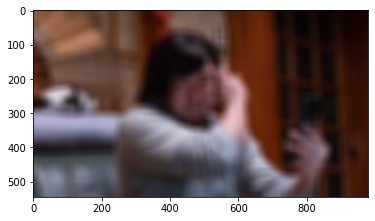

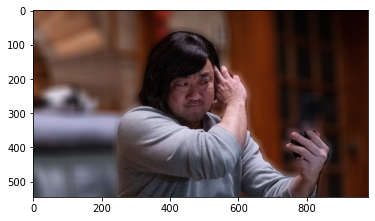

In [32]:
img_orig_blur = cv2.blur(img_orig,(30,30))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
# 기존에 마스킹된 이미지
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
plt.imshow(img_mask_color)
# 백그라운드와 반전
img_bg_mask = cv2.bitwise_not(img_mask_color)
plt.imshow(img_bg_mask)
# 기존 블러된 이미지와 결합 img_bg_mask값이 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(img_bg_blur)
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

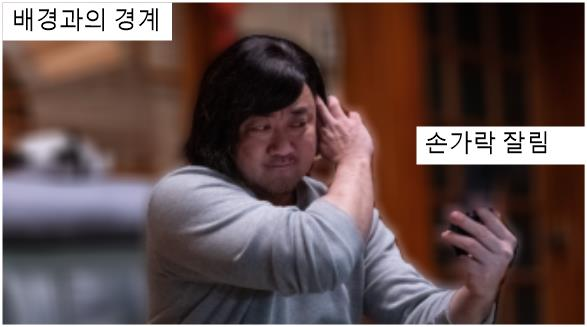